<a href="https://colab.research.google.com/github/marcinwolter/SummerStudent2022_autoencoder/blob/main/simple_autoencoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to do Unsupervised Clustering with Keras](https://www.dlology.com/blog/how-to-do-unsupervised-clustering-with-keras/) | DLology

Read my blog post for details.

https://github.com/Mboga/Keras_Deep_Clustering/blob/master/Keras-DEC.ipynb

In [22]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)

In [23]:
from time import time
import numpy as np
import keras.backend as K
from tensorflow.python.keras.layers import Layer, InputSpec
from keras.layers import Dense, Input, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import sklearn.metrics



# Read MNIST data

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_train = x_train / 255.
x_test = x_test / 255.

# Hyperparameters

In [25]:
encoding_dim = 2
batch_size = 128
epochs = 200

 # Build autoencoder



In [26]:


# This is our input image
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
#encoded = Dropout(0.2)(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
#decoded = Dropout(0.2)(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 2)                 514       
                                                                 
 dense_15 (Dense)            (None, 256)               768       
                                                                 
 dense_16 (Dense)            (None, 512)               131584    
                                                                 
 dense_17 (Dense)            (None, 784)               4021

# Train the autoencoder

In [27]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs)

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2320
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1946
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1858
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1821
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1795
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1773
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1758
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1746
Epoch 9/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1735
Epoch 10/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1727
Epoch 11/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1718
Epoch 12/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1711
Epoch 13/200


# Plot history

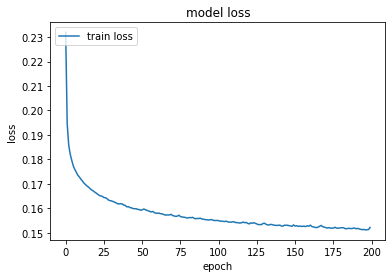

In [28]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper left')
plt.show()

# Plot clusters

(10000, 2)


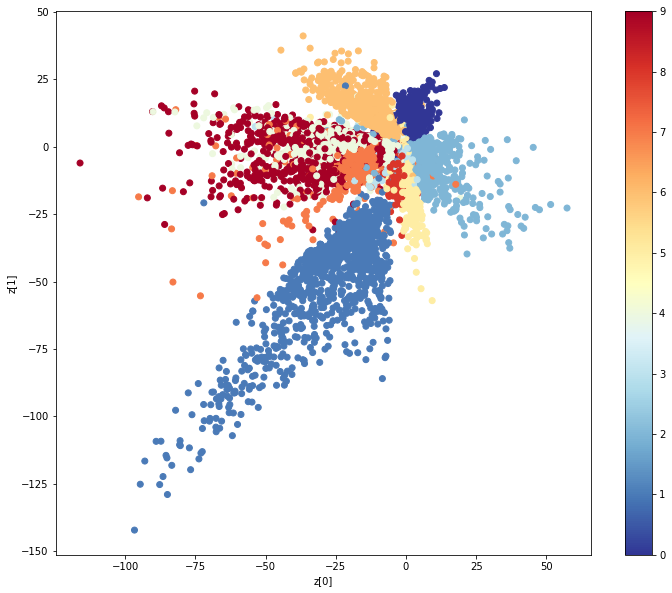

In [29]:
import matplotlib.pyplot as plt

def plot_label_clusters(encoded, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z = encoder.predict(data.reshape(len(data),784))
    print(z.shape)
    plt.figure(figsize=(12, 10))
    plt.scatter(z[:, 0], z[:, 1], c=labels, cmap="RdYlBu_r")
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()




plot_label_clusters(encoded, x_test, y_test)

# Plot digits

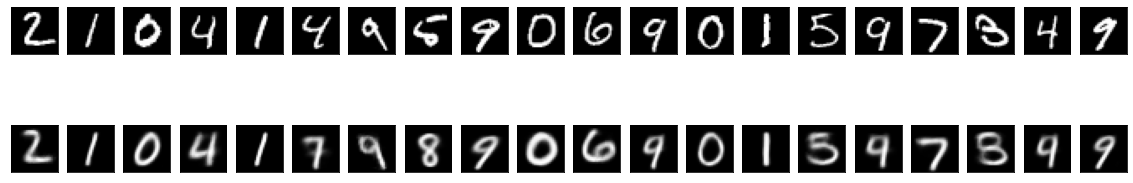

In [30]:
decoded_imgs = autoencoder.predict(x_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()